In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tweepy
import requests
import time
from datetime import date
import json
import sys

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Define location for config file
sys.path.append('../../..')

# Import Twitter API keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
date_analysis = date.today().strftime("%m/%d/%y")
date_analysis

'11/05/19'

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Identify target news organizations
org_handles = ['@BBCWorld','@CBS','@CNN','@FoxNews','@nytimes']

# Initialize dictionary to hold tweets from each news organization
news_dict = {}

In [5]:
# Loop through each target news organization
for org in org_handles:
    
    # Initialize lists to store tweets and tweet information
    org_sn = []
    tweet_texts = []
    tweet_time = []
    
    # Initialize lists for sentiments
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    
    # Loop through 5 pages of tweets (for a total of 100 tweets)
    for x in range(1,6):
        
        # Retrieve tweets from home feed
        public_tweets = api.user_timeline(org, page=x, tweet_mode='extended')
        
        # Loop through tweets and store retrieved information in list
        for tweet in public_tweets:
            
            # Store tweets and tweet information in appropriate lists
            org_sn.append(tweet['user']['screen_name'])
            tweet_texts.append(tweet['full_text'])
            tweet_time.append(tweet['created_at'])
            
            #Run Vader Analysis on tweet
            results = analyzer.polarity_scores(tweet['full_text'])
            
            # Add each value to the appropriate list
            compound_list.append(results['compound'])
            positive_list.append(results['pos'])
            neutral_list.append(results['neu'])
            negative_list.append(results['neg'])
    
    # Store tweets as an entry in a dictionary
    news_dict[org] = pd.DataFrame([org_sn,tweet_texts,tweet_time,compound_list,positive_list,neutral_list,negative_list]).transpose()
    news_dict[org].columns = ['source','tweet','timestamp','compound','positive','neutral','negative']

In [6]:
# Consolidate dataframes
for key in news_dict:
    
    if key == '@BBCWorld':
        news_df = news_dict[key]
    else:
        news_df = news_df.append(news_dict[key])

news_df = news_df.reset_index()

news_df['index'] = news_df['index'] + 1
news_df = news_df.rename(columns={'index':'tweet number'})
news_df

,tweet number,source,tweet,timestamp,compound,positive,neutral,negative
0,1,BBCWorld,Pakistan police investigate 'joint suicide' of...,Wed Nov 06 00:25:58 +0000 2019,-0.6705,0,0.609,0.391
1,2,BBCWorld,Spanish election: Five face off in race to run...,Wed Nov 06 00:23:25 +0000 2019,0,0,1,0
2,3,BBCWorld,How Cuban art fed Africa's liberation struggle...,Wed Nov 06 00:21:03 +0000 2019,-0.3612,0,0.737,0.263
3,4,BBCWorld,Gary Sondland: Explaining the Trump envoy tran...,Tue Nov 05 22:59:33 +0000 2019,0,0,1,0
4,5,BBCWorld,Brazil dam owner Vale failed to report danger ...,Tue Nov 05 22:15:56 +0000 2019,-0.7717,0,0.573,0.427
5,6,BBCWorld,Mexico Mormons: Who are the US victims of ambu...,Tue Nov 05 22:02:05 +0000 2019,-0.6597,0,0.625,0.375
6,7,BBCWorld,Jean-Claude Juncker: 'I've had enough Brexit' ...,Tue Nov 05 21:34:07 +0000 2019,0.296,0.18,0.82,0
7,8,BBCWorld,RT @BBCNorthAmerica: Who is Gordon Sondland an...,Tue Nov 05 20:37:42 +0000 2019,0,0,1,0
8,9,BBCWorld,Yemen war: Government and separatists agree de...,Tue Nov 05 19:58:51 +0000 2019,-0.34,0.162,0.584,0.253
9,10,BBCWorld,Trump envoy Gordon Sondland revises testimony ...,Tue Nov 05 19:49:38 +0000 2019,0,0,1,0


In [7]:
# Create list of sources
sources = list(news_df['source'].unique())
org_name = ['BBC','CBS','CNN','Fox','NYT']
news_orgs = dict(zip(sources,org_name))
news_orgs

{'BBCWorld': 'BBC',
 'CBS': 'CBS',
 'CNN': 'CNN',
 'FoxNews': 'Fox',
 'nytimes': 'NYT'}

In [8]:
# Loop through all tweets
for x in range(len(news_df)):
    
    # Loop through list of sources
    for org in sources:
        
        # Use conditional to determine correct organization name for each dataframe row
        if news_df.loc[x,'source'] == org:
            news_df.loc[x,'org'] = news_orgs[org]

news_df

,tweet number,source,tweet,timestamp,compound,positive,neutral,negative,org
0,1,BBCWorld,Pakistan police investigate 'joint suicide' of...,Wed Nov 06 00:25:58 +0000 2019,-0.6705,0,0.609,0.391,BBC
1,2,BBCWorld,Spanish election: Five face off in race to run...,Wed Nov 06 00:23:25 +0000 2019,0,0,1,0,BBC
2,3,BBCWorld,How Cuban art fed Africa's liberation struggle...,Wed Nov 06 00:21:03 +0000 2019,-0.3612,0,0.737,0.263,BBC
3,4,BBCWorld,Gary Sondland: Explaining the Trump envoy tran...,Tue Nov 05 22:59:33 +0000 2019,0,0,1,0,BBC
4,5,BBCWorld,Brazil dam owner Vale failed to report danger ...,Tue Nov 05 22:15:56 +0000 2019,-0.7717,0,0.573,0.427,BBC
5,6,BBCWorld,Mexico Mormons: Who are the US victims of ambu...,Tue Nov 05 22:02:05 +0000 2019,-0.6597,0,0.625,0.375,BBC
6,7,BBCWorld,Jean-Claude Juncker: 'I've had enough Brexit' ...,Tue Nov 05 21:34:07 +0000 2019,0.296,0.18,0.82,0,BBC
7,8,BBCWorld,RT @BBCNorthAmerica: Who is Gordon Sondland an...,Tue Nov 05 20:37:42 +0000 2019,0,0,1,0,BBC
8,9,BBCWorld,Yemen war: Government and separatists agree de...,Tue Nov 05 19:58:51 +0000 2019,-0.34,0.162,0.584,0.253,BBC
9,10,BBCWorld,Trump envoy Gordon Sondland revises testimony ...,Tue Nov 05 19:49:38 +0000 2019,0,0,1,0,BBC


In [9]:
# Convert unix timestamps to dates
news_df['timestamp'] = pd.to_datetime(news_df['timestamp'])

# Cast sentiment values as float
news_df['compound'] = news_df['compound'].astype('float')
news_df['positive'] = news_df['compound'].astype('float')
news_df['neutral'] = news_df['compound'].astype('float')
news_df['negative'] = news_df['compound'].astype('float')

# Create new column with formatted date
# news_df['date'] = news_df['timestamp'].map(lambda x: x.strftime('%m/%d/%y'))

# Truncate and Reorder columns of dataframe
news_df = news_df[['org','tweet number','tweet','timestamp','compound','positive','neutral','negative']]

news_df

,org,tweet number,tweet,timestamp,compound,positive,neutral,negative
0,BBC,1,Pakistan police investigate 'joint suicide' of...,2019-11-06 00:25:58+00:00,-0.6705,-0.6705,-0.6705,-0.6705
1,BBC,2,Spanish election: Five face off in race to run...,2019-11-06 00:23:25+00:00,0.0000,0.0000,0.0000,0.0000
2,BBC,3,How Cuban art fed Africa's liberation struggle...,2019-11-06 00:21:03+00:00,-0.3612,-0.3612,-0.3612,-0.3612
3,BBC,4,Gary Sondland: Explaining the Trump envoy tran...,2019-11-05 22:59:33+00:00,0.0000,0.0000,0.0000,0.0000
4,BBC,5,Brazil dam owner Vale failed to report danger ...,2019-11-05 22:15:56+00:00,-0.7717,-0.7717,-0.7717,-0.7717
5,BBC,6,Mexico Mormons: Who are the US victims of ambu...,2019-11-05 22:02:05+00:00,-0.6597,-0.6597,-0.6597,-0.6597
6,BBC,7,Jean-Claude Juncker: 'I've had enough Brexit' ...,2019-11-05 21:34:07+00:00,0.2960,0.2960,0.2960,0.2960
7,BBC,8,RT @BBCNorthAmerica: Who is Gordon Sondland an...,2019-11-05 20:37:42+00:00,0.0000,0.0000,0.0000,0.0000
8,BBC,9,Yemen war: Government and separatists agree de...,2019-11-05 19:58:51+00:00,-0.3400,-0.3400,-0.3400,-0.3400
9,BBC,10,Trump envoy Gordon Sondland revises testimony ...,2019-11-05 19:49:38+00:00,0.0000,0.0000,0.0000,0.0000


In [10]:
# Save dataframe as csv
news_df.to_csv('Output/news_tweets.csv',index=False)

In [11]:
# Create separate dataframes for each news organization
bbc_tweets = news_df.loc[news_df['org'] == 'BBC']
cbs_tweets = news_df.loc[news_df['org'] == 'CBS']
cnn_tweets = news_df.loc[news_df['org'] == 'CNN']
fox_tweets = news_df.loc[news_df['org'] == 'Fox']
nyt_tweets = news_df.loc[news_df['org'] == 'NYT']

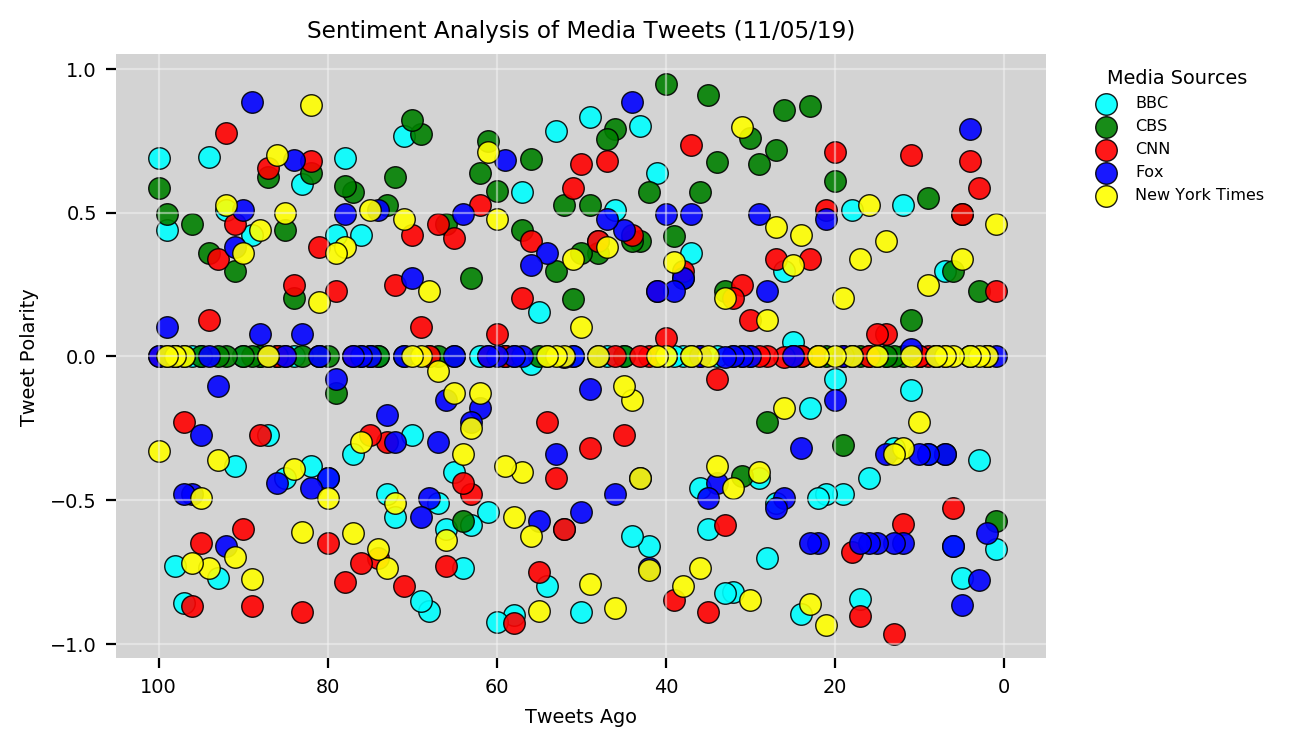

In [12]:
# Specify size of plot
plt.rcParams['figure.dpi'] = 200

# Generate plot
fig, news_tweets = plt.subplots()

# Define scatter plot data and settings for markers
news_tweets.scatter(bbc_tweets['tweet number'], bbc_tweets['compound'], label='BBC', marker='o', 
                    s=60, edgecolor ='black', linewidths=0.5, c='cyan', alpha=0.9)
news_tweets.scatter(cbs_tweets['tweet number'], cbs_tweets['compound'], label='CBS', marker='o', 
                    s=60, edgecolor='black', linewidths=0.5, c='green', alpha=0.9)
news_tweets.scatter(cnn_tweets['tweet number'], cnn_tweets['compound'], label='CNN', marker='o', 
                    s=60, edgecolor='black', linewidths=0.5, c='red', alpha=0.9)
news_tweets.scatter(fox_tweets['tweet number'], fox_tweets['compound'], label='Fox', marker='o', 
                    s=60, edgecolor='black', linewidths=0.5, c='blue', alpha=0.9)
news_tweets.scatter(nyt_tweets['tweet number'], nyt_tweets['compound'], label='New York Times', marker='o', 
                    s=60, edgecolor='black', linewidths=0.5, c='yellow', alpha=0.9)

# Define labels and formatting of plot
plt.title(f'Sentiment Analysis of Media Tweets ({date_analysis})', fontsize='small')
plt.xlabel('Tweets Ago', fontsize='x-small')
plt.ylabel('Tweet Polarity', fontsize='x-small')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), shadow=False, fontsize='xx-small', 
           title='Media Sources', title_fontsize = 'x-small', frameon=False)

# Define tick mark locations
x_major_ticks = np.arange(100,-10,-20)
y_major_ticks = np.arange(-1,1.5,0.5)

# Set format for tick marks
plt.xticks(fontsize='x-small')
plt.yticks(fontsize='x-small')
news_tweets.set_xticks(x_major_ticks)
news_tweets.set_yticks(y_major_ticks)

# Define min and max value limits for x- and y-axes
plt.xlim(105, -5, 20)
plt.ylim(-1.05, 1.05, 0.5)

# Remove border around plot
news_tweets.spines['top'].set_visible(False)
news_tweets.spines['bottom'].set_visible(False)
news_tweets.spines['right'].set_visible(False)
news_tweets.spines['left'].set_visible(False)

# Show grid
plt.grid(color='whitesmoke', alpha=1.5)

# Set plot background colot
news_tweets.set_facecolor('lightgray')

# Save figure
plt.savefig('Output/news_sentiment_scatter.png')

# Show figure
plt.show()

In [13]:
# Create dataframe with mean values for compound sentiment for each news organization
sentiment_summary = news_df.groupby('org').agg({'compound':'mean'})
sentiment_summary

,compound
org,
BBC,-0.154508
CBS,0.246678
CNN,-0.036541
Fox,-0.088555
NYT,-0.096548


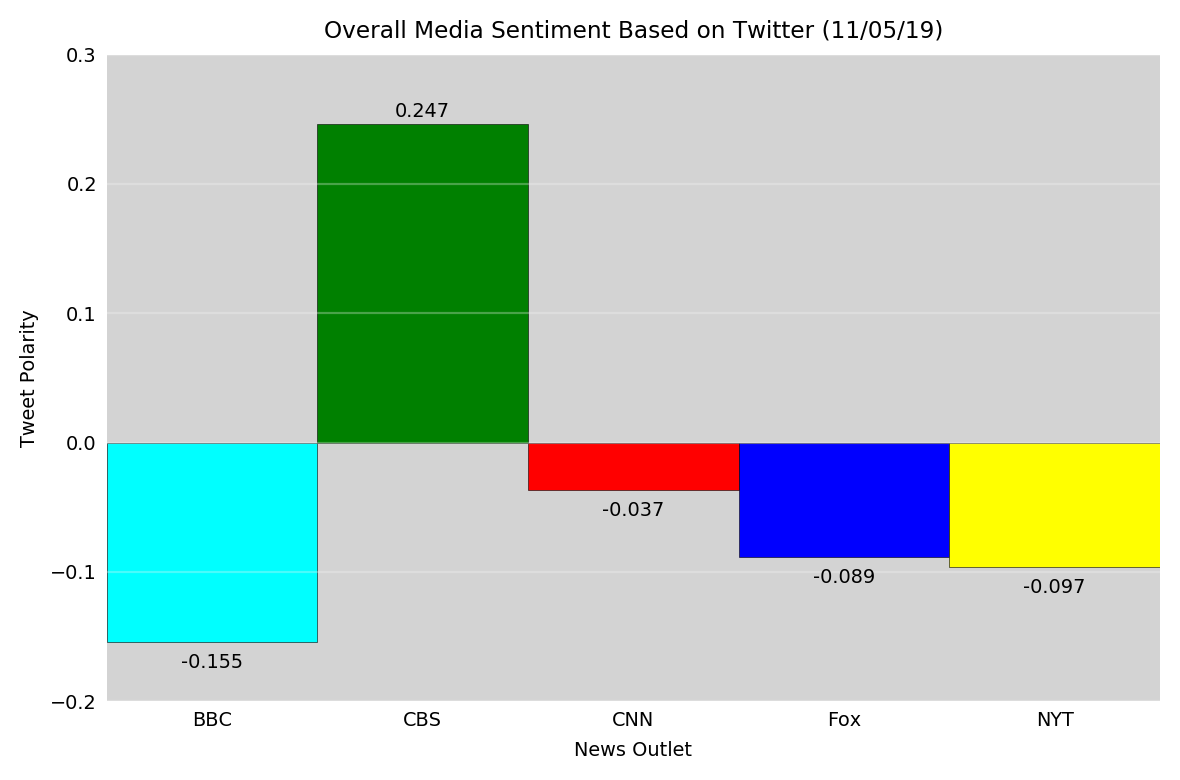

In [14]:
# Define color of bar based on value (i.e., red for positive values and green for negative values)
colors = ['cyan','green','red','blue','yellow']

# Set plot size
plt.rcParams['figure.dpi'] = 200

# Generate plot
fig, sentiment_overall = plt.subplots()

# Set bar width size
bar_width = 1

# Define bar plot data and settings for markers
plt.bar(sentiment_summary.index, sentiment_summary['compound'], width=bar_width, 
        color=colors, edgecolor='black', linewidth=0.2, alpha=1)

# Define labels and formatting of plot
plt.title(f'Overall Media Sentiment Based on Twitter ({date_analysis})', fontsize='small')
plt.xlabel('News Outlet', fontsize='x-small')
plt.ylabel('Tweet Polarity', fontsize='x-small')
plt.xticks(fontsize='x-small')
plt.yticks(fontsize='x-small')

# Define format for x-axis
plt.xlim([-bar_width/2,len(sentiment_summary)-bar_width/2])

# Define min and max value limits for y-axis
ylim_min = round(sentiment_summary['compound'].min(),2) - (sentiment_summary['compound'].min() % 2 > 0) * 0.05
ylim_max = round(sentiment_summary['compound'].max(),2) + (sentiment_summary['compound'].max() % 2 > 0) * 0.05
plt.ylim(ylim_min, ylim_max, 0.05)

# Show grid
plt.grid(axis='y', color='whitesmoke', alpha=0.3)

# Set plot background colot
sentiment_overall.set_facecolor('lightgray')

# Remove border around plot
sentiment_overall.spines['top'].set_visible(False)
sentiment_overall.spines['bottom'].set_visible(False)
sentiment_overall.spines['right'].set_visible(False)
sentiment_overall.spines['left'].set_visible(False)

# Remove tick marks
sentiment_overall.tick_params(axis=u'both', which=u'both',length=0)

# Use for loop and conditional to display values represented by bars
for i, v in enumerate(sentiment_summary['compound']):
    if sentiment_summary['compound'][i] < 0:
        sentiment_overall.text(i, 
                               v-.02, 
                               str(round(sentiment_summary['compound'][i],3)), 
                               fontsize='x-small', 
                               color='black', 
                               ha='center')
    else:
        sentiment_overall.text(i, 
                               v+0.005,
                               str(round(sentiment_summary['compound'][i],3)), 
                               color='black', 
                               fontsize='x-small', 
                               ha='center')

# Save figure
plt.tight_layout()
plt.savefig('Output/news_sentiment_bar.png')

# Show figure
plt.show()